In [23]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Import dataset
thurber = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/Thurber.csv')

# Split off 20% of the data to be left out as test data
thurberTrainingData, test_data = train_test_split(thurber, test_size=0.20)

# Store relevant columns as variables
X = thurberTrainingData[['log(Density)']].values.reshape(-1, 1)
y = thurberTrainingData[['Electron mobility']].values.reshape(-1, 1)

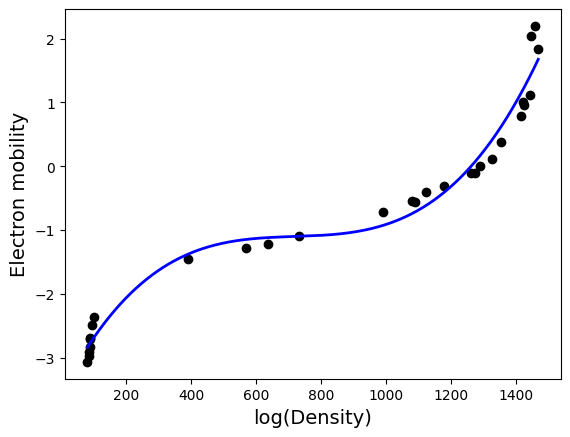

In [56]:
# Fit a cubic regression model
polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)

# Graph the scatterplot and the polynomial regression
plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)


#yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
yDelta = polyModel.predict(polyFeatures.transform(xDelta.reshape(-1, 1)))
#NOTE: the author uses fit_transform. However just tranform should be used!



plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('log(Density)', fontsize=14);
plt.ylabel('Electron mobility', fontsize=14);

In [62]:
# Collect cross-validation metrics

import statsmodels.api as sm
cvMeans = []
cvStdDev = []

for i in range(1, 7):
    # Fit a degree i polynomial regression model
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    XPoly= sm.add_constant(XPoly)
    model = sm.OLS(y, XPoly).fit()

    print(f"Degree {i} - AIC: {model.aic}, BIC:{model.bic}")

    # Carry out 10-fold cross-validation for the a degree i polynomial regression model
    polyscore = -cross_val_score(
        polyModel, XPoly, y, scoring='neg_mean_squared_error', cv=10
    )

    # Store the mean and standard deviation of the 10-fold cross-validation for the degree i polynomial regression model
    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

print(cvMeans)
print(cvStdDev)

Degree 1 - AIC: 41.9350608931264, BIC:44.66965255309935
Degree 2 - AIC: 36.46317599302789, BIC:40.56506348298731
Degree 3 - AIC: 5.126656676194095, BIC:10.595839996139992
Degree 4 - AIC: 4.860418411718349, BIC:11.696897561650719
Degree 5 - AIC: 34.66053862762549, BIC:41.49701777755786
Degree 6 - AIC: 103.36696188230339, BIC:108.83614520224928
[0.24035218918197732, 0.19297137285875463, 0.06816781584377284, 0.06688410532918826, 0.05228561065726746, 0.05749717792539723]
[0.18056281957838483, 0.14654413047298995, 0.05371456581056143, 0.055853688642225216, 0.04539627487090763, 0.056192359759553966]


 **One-Standard Error Method:**

The lowest mean cross-validation error is for Degree x with a mean MSE of 0.xxxx.
Calculate the One-Standard Error Range:

The standard deviation of cross-validation error for Degree 5 is 0.yyyy.

Adding this standard deviation to the mean MSE of Degree 5 gives us the upper limit for the one-standard error range:
0.XXXX
+
0.yyyy
=
0.?????


This means we’re looking for the simplest model with a mean MSE that is .???? or lower.

Now, let’s check each model's mean MSE to find the simplest one within the 0.???? range:

The simplest model within this range is Degree xyz.


Text(0, 0.5, 'Mean squared error')

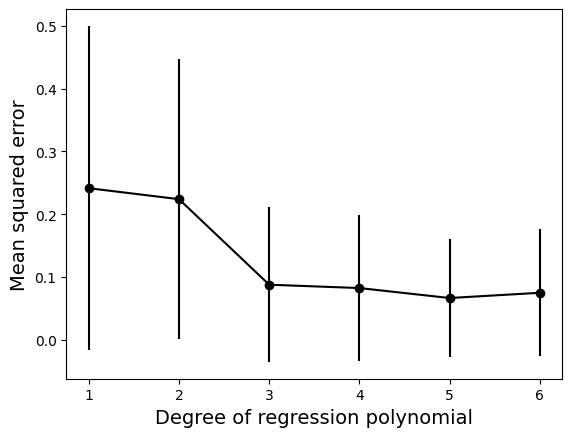

In [15]:
# Graph the errorbar chart using the cross-validation means and std deviations
plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)